# MNIST Dataset
In this notebook we will use the Normal Equation, Gradient Descent and Perceptron Learning. Furthermore, we will check the accuracy. 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Importing the data using pandas dataframe.  

In [2]:
train = pd.read_csv('D:\Projects\MLProjects\mnist_train.csv')

Let's have a look at the shape of the dataset

In [3]:
train.shape

(59999, 785)

Also, let's have a look into the rows of the dataset

In [4]:
train.head

<bound method NDFrame.head of       7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...    0.658  0.659  \
0     2  0    0    0    0    0    0    0    0    0  ...        0      0   
1     1  0    0    0    0    0    0    0    0    0  ...        0      0   
2     0  0    0    0    0    0    0    0    0    0  ...        0      0   
3     4  0    0    0    0    0    0    0    0    0  ...        0      0   
4     1  0    0    0    0    0    0    0    0    0  ...        0      0   
5     4  0    0    0    0    0    0    0    0    0  ...        0      0   
6     9  0    0    0    0    0    0    0    0    0  ...        0      0   
7     5  0    0    0    0    0    0    0    0    0  ...        0      0   
8     9  0    0    0    0    0    0    0    0    0  ...        0      0   
9     0  0    0    0    0    0    0    0    0    0  ...        0      0   
10    6  0    0    0    0    0    0    0    0    0  ...        0      0   
11    9  0    0    0    0    0    0    0    0    0  ...        0      

We see it as n x m matrix, with n = 9999 examples(images) in the dataset. 

In [5]:
#Select 5 random examples from the dataset
random_examples = random.sample(range(train.shape[0]), 5)

In [6]:
#Original image is found by reshaping the rows
orig_img = [np.array(train.iloc[element,1:]).reshape(28,28) for element in random_examples]

#784 dimensional array form
array_form = [np.array(train.iloc[element,1:]) for element in random_examples]

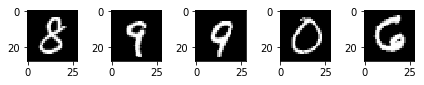

In [7]:
# Visualizing the original images
fig, axes = plt.subplots(nrows=1, ncols=5)
i=0
for x in axes:
    x.imshow(orig_img[i], cmap = 'gist_gray')
    i += 1
fig.tight_layout()

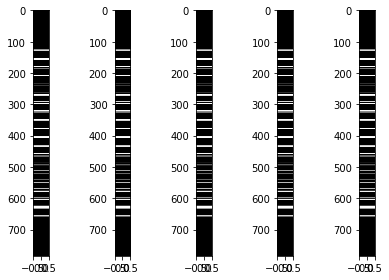

In [8]:
#Visualizing the 784-dimensional array
fig, axes = plt.subplots(nrows=1, ncols=5)
i=0
for x in axes:
    x.imshow(array_form[0].reshape(784, 1), aspect = 0.02, cmap='gist_gray')
    i += 1
fig.tight_layout()

Now we need to find the general statistical properties of the matrix 'train'. As we know that many of the pixels have intensity '0'. 

In [9]:
train.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,4.443144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179318,0.163616,0.052605,0.000600,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674433,5.736359,2.420125,0.060003,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Now we find the most likely pixel containing the digit
# This can be calculated by finding the pixel column with the maximum mean
a = train.describe().loc['mean'].idxmax()
a

'0.370'

### Splitting the dataset into Training Set and Test Set.

In [5]:
# Loading the test dataset
test = pd.read_csv('D:\Projects\MLProjects\mnist_test.csv')

# Dividing the train dataset
y_train = train.iloc[:,0].values
X_train = train.iloc[:,1:].values

# Dividing the test dataset
y_test = test.iloc[:,0].values
X_test = test.iloc[:,1:].values

## Normal Equation Implementation

We will be implementing the normal equation. 

In [12]:
# Finding the transpose of the Train Data
transpose_matrix = X_train.transpose()

In [13]:
# This will be followed by the matrix multiplication of the 'transpose_matrix' and 'X_train'
matrix_mult = np.matmul(transpose_matrix , X_train)

In [14]:
#Inverse of the 'matrix_mult'
inverse = np.linalg.pinv(matrix_mult)

In [15]:
# Matrix Multiplication of the 'transpose_matrix' and 'y_train'
mult_ = np.matmul(transpose_matrix, y_train)

In [16]:
# This is the final weight
result_ = np.matmul(inverse,mult_)
result_.shape

(784,)

In [17]:
#Checking shape of 'X_test'
X_test.shape

(2000, 784)

In [20]:
# Making final predictions on the 'X-test' data
y_pred = np.dot(X_test, result_)

In [24]:
#y_test
y_pred

array([ 2.60094179,  6.66979254,  1.7626087 , ..., -1.56534493,
        9.0202329 ,  1.80550508])

# Gradient Descent Implementation
We shall be implementing gradient descent with the cost fucntion

In [5]:
#Normalizes each pixel column[-1,1]
def normalize(X):
    M = X.shape[1]
    for i in range(M):
        if np.any(X[:,i]) != 0:
            min_value = X[:,i].min()
            max_value = X[:,i].max()
            X[:,i] =(2*X[:,i]- min_value - max_value)/(max_value - min_value)

def append_ones(X):
    s = X.shape[0]
    ones = np.ones(shape=(s,1))
    return np.concatenate((ones, X), axis=1)

# Hence using the normalize and append_ones on both 'X_train' and 'X_test'
X_train = np.array(X_train)
normalize(X_train)
X_train = append_ones(X_train)

X_test = np.array(X_test)
normalize(X_test)
X_test = append_ones(X_test)

In [6]:
# Now we need to create a vector for each digit to be stored
y_target = []
for i in range(10):
    y_target.append(y_train.apply(lambda x: 1 if x == i else 0))

In [7]:
theta=[]

#Cost Function 
def cost(X, y , theta):
    dim = X.shape[0]
    dot_product = np.power(((X @ theta.T) - y), 2)
    return np.sum(dot_product) / (2 * dim)
    
#Gradient of the cost function
def grad_cost(X, y, theta):
    dim = X.shape[0]
    pred = np.dot(X,theta)
    c1 = 1/dim * np.transpose(pred-y)
    return np.transpose(np.dot(c1,X))

#Gradient descent 
def grad_descent(X, y, theta, learning_par, num_iter):
    for i in range(num_iter):
        theta = theta - learning_par*grad_cost(X,y,theta)
        
    return theta

In [13]:
# Main Implementation
for i in range(10):
    y_temp = np.array(y_target[i])
    y_temp = y_temp.reshape(y_train.shape[0],1)

    theta_temp = np.zeros(shape=(X_train.shape[1],1))

    learning_rate = 0.0000001
    iterations = 1000

    theta_temp = grad_descent(X_train,y_temp,theta_temp,learning_rate,iterations)
    theta.append(theta_temp)
    print('{}: Completed for this digit!'.format(i))

0: Completed for this digit!
1: Completed for this digit!
2: Completed for this digit!
3: Completed for this digit!
4: Completed for this digit!
5: Completed for this digit!
6: Completed for this digit!
7: Completed for this digit!
8: Completed for this digit!
9: Completed for this digit!


In [14]:
result = [np.dot(X_test,theta[i]) for i in range(10)]
result = np.transpose(np.array(result)).reshape(X_test.shape[0],10)

prediction = (np.array([element.argmax() for element in result])).reshape(X_test.shape[0],1)

y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0],1)


accuracy = sum(prediction == y_test)[0]/(y_test.shape[0])
print('Accuracy is: {}'.format(accuracy))

Accuracy is: 0.7315


The accuracy is very good, around 73.15%. We shall now implement Perceptron Learning and see if we can further improve. 

# Perceptron Learning
Furthering our learning to see if this increases the accuracy

In [22]:
# Now we shall create functions to work on Perceptron Learning Model
def create_weights(data):
    a, b = np.shape(data)
    weights = np.random.rand(b,1)
    return weights

weights = create_weights(X_train)

In [23]:
def predict(points, weights):
    b = np.dot(points, weights)
    a = b>0
    return a*1

In [24]:
# Now we need to call this for all the 10 digits but first we need to make it work for one number
def one_digit(labels, number):
    return (labels == number)*1

In [25]:
# We shall use a function to update values, and call the predict function
def update(weights, points, labels, learning_rate=.1):
    predicted = predict(points, weights)
    temp = np.zeros(np.shape(weights))
    temp[:,0] = learning_rate*(labels-predicted)*points
    return temp+weights

In [26]:
# Now we shall train the perceptron on the training dataset
def perceptron(data, labels, weights, learning_rate = .001, iterations = 100):
    for j in range(0, iterations):
        for i in range(0, len(data)):
            weights = update(weights, data[i], labels[i], learning_rate)
    return weights

In [27]:
# Calling this for all 10 digits
def all_digits(data,labels):
    c,d = np.shape(data)
    w = create_weights(data)
    weights = []
    for i in range(0,  len(np.unique(labels))):
        z = one_digit(labels, i)
        a = perceptron(data, z, w, .1, 4)
        weights.append(a[:,0])
    return np.asarray(weights)

In [28]:
Value = all_digits(X_train, y_train)

In [30]:
def result(data, weights):
    a = np.dot(data,np.transpose(weights))
    b = len(np.shape(data))
    if b == 1:
        return np.argmax(a)
    return np.argmax(a, axis=1)


def fit(data, labels, weights):
    a = np.shape(labels)
    predicted = result(data, weights)
    correct = predicted == labels
    accuracy = np.sum(correct)/float(a[0])
    return accuracy

In [31]:
# Now we shall see the accuracy on the test dataset
print(fit(X_test, y_test, Value))

0.854


We can see an improvement from the gradient descent. The accuracy has increased further from 73.15% to 85.4%. This is a brilliant accuracy of the dataset. 